# Format HYCOM data

In [29]:
import xarray as xr
import pandas as pd
import numpy as np
from dask.distributed import Client
import hvplot.xarray
from oceans.sw_extras import sw_extras as sw
from matplotlib import pyplot as plt

In [7]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 32,Total memory: 62.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45749,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: Just now,Total memory: 62.80 GiB
Comm: tcp://127.0.0.1:42747,Total threads: 4
Dashboard: http://127.0.0.1:35393/status,Memory: 7.85 GiB
Nanny: tcp://127.0.0.1:33305,


In [2]:
fdir = '/datadrive/HYCOM_data/Axial_Seamount_earthengine/*.nc'
ds = xr.open_mfdataset(fdir)

In [3]:
time_coord = pd.to_datetime(np.arange(pd.Timestamp('2015-01-01').value, pd.Timestamp('2023-01-01').value, 1e9*3600*24))

In [21]:
ds_interp = ds.interp(time=time_coord).compute()

In [24]:
ssp = sw.soundspeed(ds_interp.salinity, ds_interp.temperature, ds.depth)

(0.0, 1500.0)

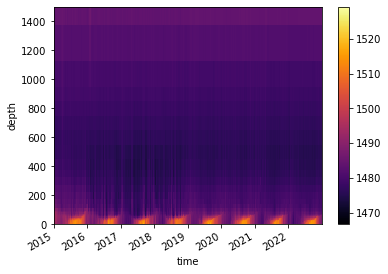

In [30]:
ssp.plot(x='time', cmap='inferno')
plt.ylim([0,1500])

In [31]:
ssp

<xarray.DataArray (time: 2922, depth: 40)>
array([[1495.00256956, 1495.09541472, 1495.13143022, ...,           nan,
                  nan,           nan],
       [1493.99876093, 1494.06516176, 1494.09715559, ...,           nan,
                  nan,           nan],
       [1492.9872167 , 1493.02675233, 1493.05466741, ...,           nan,
                  nan,           nan],
       ...,
       [1487.0457869 , 1487.08924364, 1487.12546415, ...,           nan,
                  nan,           nan],
       [1486.10674535, 1486.13694257, 1486.16590177, ...,           nan,
                  nan,           nan],
       [1485.9269759 , 1485.95957657, 1485.99217858, ...,           nan,
                  nan,           nan]])
Coordinates:
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2022-12-31